#### Tweets Sentiment Test

Below I used the sentiment analysis results to perform hypothesis tests on the positive tweets ratio.

The results are from the main analysis notebook. See 'Three Platform Analysis.ipynp'

In [1]:
import pandas as pd
import seaborn as sb
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [24]:
pinterest_sentiment_analysis = pd.read_csv('pins_sentiment_analysis.txt', index_col = None)
instagram_sentiment_analysis = pd.read_csv('insta_sentiment_analysis.txt', index_col = None)
snapchat_sentiment_analysis = pd.read_csv('snap_sentiment_analysis.txt', index_col = None)

In [30]:
len(pinterest_sentiment_analysis), len(instagram_sentiment_analysis), len(snapchat_sentiment_analysis)

(3125, 155048, 7564)

In [25]:
pinterest_sentiment_analysis.describe()

,Unnamed: 0,negative,neutral,positive,compound
count,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000
mean,1562.000000,0.033305,0.821725,0.144650,0.226446
std,902.254122,0.089705,0.186654,0.170836,0.370286
min,0.000000,0.000000,0.000000,0.000000,-0.959200
25%,781.000000,0.000000,0.695000,0.000000,0.000000
50%,1562.000000,0.000000,0.847000,0.104000,0.000000
75%,2343.000000,0.000000,1.000000,0.256000,0.536700
max,3124.000000,0.784000,1.000000,1.000000,0.991400


** Positive ratio for each platform is determined by the amount of tweets with positive value greater than 0.5 divided by the total amount of tweets

In [8]:
pins_pos = pinterest_sentiment_analysis[pinterest_sentiment_analysis['positive'] > 0.5]
pins_pos.head()

,Unnamed: 0,text,negative,neutral,positive,compound
13,13,I just love a great list. lol. Looking at plan...,0.0,0.420,0.580,0.9605
14,14,easy and quick,0.0,0.408,0.592,0.4404
18,18,Verizon Wireless Gift Card Giveaway Work Money...,0.0,0.492,0.508,0.7351
78,78,I love putting a fun spin on the title. How do...,0.0,0.481,0.519,0.9186
123,123,Great Haircut at great price via,0.0,0.328,0.672,0.8481


In [9]:
insta_pos = instagram_sentiment_analysis[instagram_sentiment_analysis['positive'] > 0.5]
insta_pos.head()

,Unnamed: 0,text,negative,neutral,positive,compound
10,10,Never Forget,0.0,0.375,0.625,0.1695
21,21,On Instagram lol,0.0,0.417,0.583,0.4215
68,68,Doing what I like,0.0,0.444,0.556,0.3612
97,97,#ijs @ United States,0.0,0.417,0.583,0.4215
122,122,#Repost nathanyel7 Keep your spirit strong kee...,0.0,0.452,0.548,0.8271


In [10]:
snap_pos = snapchat_sentiment_analysis[snapchat_sentiment_analysis['positive'] > 0.5]
snap_pos.head()

,Unnamed: 0,text,negative,neutral,positive,compound
5,5,I got Snapchat now yay!!!,0.0,0.412,0.588,0.6458
56,56,Thank you bby,0.0,0.444,0.556,0.3612
96,96,I wonder what special sound snapchat makes whe...,0.0,0.442,0.558,0.8779
107,107,Nude snapchat! Easy register.,0.0,0.484,0.516,0.4926
130,130,MILESTONE ALERT The absolutely stunning and am...,0.0,0.440,0.560,0.9324


In [27]:
pins_pos_ratio = len(pins_pos)/len(pinterest_sentiment_analysis)
insta_pos_ratio = len(insta_pos)/len(instagram_sentiment_analysis)
snap_pos_ratio = len(snap_pos)/len(snapchat_sentiment_analysis)

pins_pos_ratio, insta_pos_ratio, snap_pos_ratio

(0.03296, 0.034260358082658274, 0.023929138022210472)

In [16]:
pins_neg = pinterest_sentiment_analysis[pinterest_sentiment_analysis['negative'] > 0.5]
pins_neg.head()

,Unnamed: 0,text,negative,neutral,positive,compound
295,295,I hate pinterest so much.,0.552,0.448,0.0,-0.5719
380,380,Put my dumb ass on pinterest,0.630,0.370,0.0,-0.7783
668,668,is pinterest broken,0.608,0.392,0.0,-0.4767
691,691,No lol...,0.688,0.312,0.0,-0.2960
826,826,Worst thing on Pinterest then !,0.523,0.477,0.0,-0.6588


** Negative ratio for each platform is determined by the amount of tweets with negative value greater than 0.5 divided by the total amount of tweets

In [17]:
insta_neg = instagram_sentiment_analysis[instagram_sentiment_analysis['negative'] > 0.5]
insta_neg.head()

,Unnamed: 0,text,negative,neutral,positive,compound
79,79,THE MOST HORRIBLE &amp; SAD DAY IN HISTORY!!! ...,0.512,0.420,0.067,-0.9577
90,90,Sin frase...,0.783,0.217,0.000,-0.5574
217,217,"The fuck does this bitch want - Maggie, 2019",0.537,0.368,0.096,-0.7906
389,389,I shouldnt be laughing this hard,0.579,0.421,0.000,-0.4815
599,599,Me home bored,0.512,0.488,0.000,-0.2732


In [18]:
snap_neg = snapchat_sentiment_analysis[snapchat_sentiment_analysis['negative'] > 0.5]
snap_neg.head()

,Unnamed: 0,text,negative,neutral,positive,compound
54,54,snapchat sucks,0.714,0.286,0.0,-0.3612
189,189,Currently in shame,0.608,0.392,0.0,-0.4767
191,191,No one: Snapchat:,0.524,0.476,0.0,-0.2960
351,351,Can Snapchat stop bringing up these dumb ass m...,0.600,0.400,0.0,-0.8402
510,510,Bc theyre the absolute worst,0.506,0.494,0.0,-0.6249


In [19]:
pins_neg_ratio = len(pins_neg)/len(pinterest_sentiment_analysis)
insta_neg_ratio = len(insta_neg)/len(instagram_sentiment_analysis)
snap_neg_ratio = len(snap_neg)/len(snapchat_sentiment_analysis)

pins_neg_ratio, insta_neg_ratio, snap_neg_ratio

(0.00608, 0.006011041741912182, 0.017583289264939187)

** All the remaining tweets are neutral, including tweets with neutral value greater than 0.5, and tweets that have even value among positive/negative/neutral

In [28]:
pins_neu_ratio = 1- pins_pos_ratio - pins_neg_ratio
insta_neu_ratio = 1- insta_pos_ratio - insta_neg_ratio
snap_neu_ratio = 1- snap_pos_ratio - snap_neg_ratio

In [29]:
pins_neu_ratio, insta_neu_ratio, snap_neu_ratio

(0.96096, 0.9597286001754296, 0.9584875727128503)

** Metric to measure the positivity: 

Relative Positive Ratio = # of positive tweets / (# of positive tweets + # of negative tweets)

In [54]:
pins_relative = len(pins_pos)/(len(pins_pos) + len(pins_neg))
insta_relative = len(insta_pos)/(len(insta_pos) + len(insta_neg))
snap_relative = len(snap_pos)/(len(snap_pos) + len(snap_neg))
pins_relative, insta_relative,  snap_relative

(0.8442622950819673, 0.8507367072389493, 0.5764331210191083)

In [51]:
def bootstrap(sample_df):
    sample_list = sample_df.values.tolist()
    sample_size = len(sample_df)
    get_sample = []
    
    random_select = np.random.randint(0, (sample_size -1), sample_size)
    for j in random_select:
        get_sample.append(sample_list[j])
    
    return get_sample
        

In [57]:
def relatively_positive_ratio(sample_list):
    positive_count = 0
    negative_count = 0
    for i in sample_list:
        if i[2] > 0.5:
            negative_count += 1
        elif i[4] > 0.5:
            positive_count += 1
    if positive_count + negative_count == 0:
        return 0
    else:
        return positive_count/(positive_count + negative_count)

In [62]:
pins_rpr_list = []
for i in range(1000):
    sample = bootstrap(pinterest_sentiment_analysis)
    pins_rpr_list.append(relatively_positive_ratio(sample))
    

In [68]:
insta_rpr_list = []
for i in range(1000):
    sample = bootstrap(instagram_sentiment_analysis)
    insta_rpr_list.append(relatively_positive_ratio(sample))

In [66]:
snap_rpr_list = []
for i in range(1000):
    sample = bootstrap(snapchat_sentiment_analysis)
    snap_rpr_list.append(relatively_positive_ratio(sample))

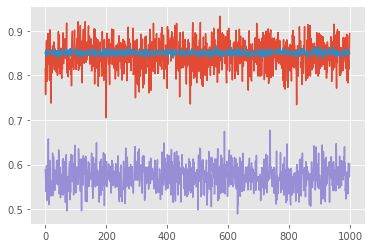

In [69]:
plt.plot([i for i in range(1000)], pins_rpr_list)
plt.plot([i for i in range(1000)], insta_rpr_list)
plt.plot([i for i in range(1000)], snap_rpr_list);

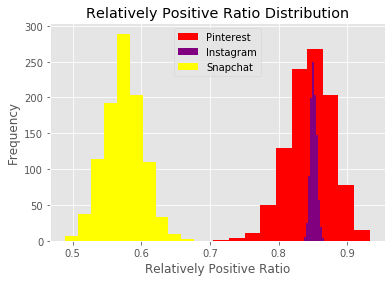

In [75]:
plt.hist(pins_rpr_list, color = 'red', label = 'Pinterest')
plt.hist(insta_rpr_list, color = 'purple', label = 'Instagram')
plt.hist(snap_rpr_list, color = 'yellow', label = 'Snapchat')
plt.legend()
plt.xlabel('Relatively Positive Ratio')
plt.ylabel('Frequency')
plt.title('Relatively Positive Ratio Distribution')
plt.savefig('Relatively Positive Ratio Distribution.jpg');

In [81]:
"""

Pints_RPR: The mean of tweets RPR for pinterest 
Insta_RPR: The mean of tweets RPR for instagram
Snap_RPR: The mean of tweets RPR for snapchat

Null_1 Hypothesis: Pints_RPR = Insta_RPR
Alternate_1 Hypothesis: Pints_RPR < Insta_RPR

Null_2 Hypothesis: Pints_RPR = Snap_RPR
Alternate_2 Hypothesis: Pints_RPR > Snap_RPR

Null_3 Hypothesis: Insta_RPR = Snap_RPR
Alternate_3 Hypothesis: Insta_RPR > Snap_RPR

Alpha = 0.05/3

"""

insta_greater_pins = stats.mannwhitneyu(insta_rpr_list, pins_rpr_list, alternative="greater")
print("p-value for insta_rpr > pins_rpr : {:2.10f}".format(insta_greater_pins.pvalue))

pins_greater_snap = stats.mannwhitneyu(pins_rpr_list, snap_rpr_list, alternative="greater")
print("p-value for pins_rpr > snap_rpr: {:2.10f}".format(pins_greater_snap.pvalue))

insta_greater_snap = stats.mannwhitneyu(insta_rpr_list, snap_rpr_list, alternative="greater")
print("p-value for insta_rpr > snap_rpr: {:2.10f}".format(insta_greater_snap.pvalue))

p-value for insta_rpr > pins_rpr : 0.0000884395
p-value for pins_rpr > snap_rpr: 0.0000000000
p-value for insta_rpr > snap_rpr: 0.0000000000


In [52]:
test = pinterest_sentiment_analysis[:10]

bootstrap(test)


[[6,
  'Sell your products direct from #Pinterest with buyable pins - #growthhacking #etsy',
  0.0,
  1.0,
  0.0,
  0.0],
 [4,
  'This easy roll recipe needs just a few ingredients. A perfect side dish to any dinner, try these hom',
  0.0,
  0.6940000000000001,
  0.306,
  0.765],
 [0,
  'Check our our #Pinterest board for loads of great #metacognition #teaching resources &amp; ideas! --&gt;',
  0.0,
  0.7609999999999999,
  0.239,
  0.6588],
 [8,
  "We've been updating our rattan-inspired Pinterest board this afternoon: #enkimaguk",
  0.0,
  1.0,
  0.0,
  0.0],
 [6,
  'Sell your products direct from #Pinterest with buyable pins - #growthhacking #etsy',
  0.0,
  1.0,
  0.0,
  0.0],
 [6,
  'Sell your products direct from #Pinterest with buyable pins - #growthhacking #etsy',
  0.0,
  1.0,
  0.0,
  0.0],
 [3,
  'Add Pepha Tight (seaweed or algae) to any product you have to firm up fast! #pephatight #miracletigh',
  0.0,
  1.0,
  0.0,
  0.0],
 [3,
  'Add Pepha Tight (seaweed or algae) to any

In [58]:
relatively_positive_ratio(bootstrap(test))

0